<a href="https://colab.research.google.com/github/Tanakrong/Gustavo/blob/main/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bases de Datos y Librerias

# 📂 Data Dictionary & Schema

This dataset contains customer-level information for a telecommunications company. The data is organized into five main dimensions: Demographics, Location, Population, Services, and Customer Status (Churn/Revenue).

---

## 1. Demographics (Customer Profile)
Variables related to the customer's identity and family structure.

* **`CustomerID`**: A unique ID that identifies each customer.
* **`Count`**: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
* **`Gender`**: The customer’s gender (Male, Female).
* **`Age`**: The customer’s current age, in years, at the time the fiscal quarter ended.
* **`Senior Citizen`**: Indicates if the customer is 65 or older (Yes, No).
* **`Married`**: Indicates if the customer is married (Yes, No).
* **`Dependents`**: Indicates if the customer lives with any dependents (children, parents, grandparents, etc.) (Yes, No).
* **`Number of Dependents`**: Indicates the number of dependents that live with the customer.

---

## 2. Location (Geography)
Location data for geospatial analysis and regional segmentation.

* **`CustomerID`**: A unique ID that identifies each customer.
* **`Count`**: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
* **`Country`**: The country of the customer’s primary residence.
* **`State`**: The state of the customer’s primary residence.
* **`City`**: The city of the customer’s primary residence.
* **`Zip Code`**: The zip code of the customer’s primary residence.
* **`Lat Long`**: The combined latitude and longitude of the customer’s primary residence.
* **`Latitude`**: The latitude of the customer’s primary residence.
* **`Longitude`**: The longitude of the customer’s primary residence.

---

## 3. Population (Demographic Context)
External data to enrich the analysis based on the residence area.

* **`ID`**: A unique ID that identifies each row.
* **`Zip Code`**: The zip code of the customer’s primary residence (Foreign Key).
* **`Population`**: A current population estimate for the entire Zip Code area.

---

## 4. Services (Product & Revenue)
The core of the business. Describes what the customer buys and how much they pay. Vital for calculating ARPU (Average Revenue Per User).

* **`CustomerID`**: A unique ID that identifies each customer.
* **`Count`**: Value used for reporting.
* **`Quarter`**: The fiscal quarter that the data has been derived from (e.g., Q3).
* **`Referred a Friend`**: Indicates if the customer has ever referred a friend or family member (Yes, No).
* **`Number of Referrals`**: Indicates the number of referrals to date that the customer has made.
* **`Tenure in Months`**: Total amount of months that the customer has been with the company by the end of the quarter.
* **`Offer`**: Identifies the last marketing offer that the customer accepted (None, Offer A-E).
* **`Phone Service`**: Indicates if the customer subscribes to home phone service (Yes, No).
* **`Avg Monthly Long Distance Charges`**: Customer’s average long distance charges calculated to the end of the quarter.
* **`Multiple Lines`**: Indicates if the customer subscribes to multiple telephone lines (Yes, No).
* **`Internet Service`**: Type of internet service (No, DSL, Fiber Optic, Cable).
* **`Avg Monthly GB Download`**: Average download volume in gigabytes.
* **`Online Security`**: Subscription to additional online security service (Yes, No).
* **`Online Backup`**: Subscription to additional online backup service (Yes, No).
* **`Device Protection Plan`**: Subscription to additional device protection plan (Yes, No).
* **`Premium Tech Support`**: Subscription to additional technical support plan (Yes, No).
* **`Streaming TV`**: Usage of Internet service to stream third-party television programming (Yes, No).
* **`Streaming Movies`**: Usage of Internet service to stream third-party movies (Yes, No).
* **`Streaming Music`**: Usage of Internet service to stream third-party music (Yes, No).
* **`Unlimited Data`**: Paid additional monthly fee for unlimited data (Yes, No).
* **`Contract`**: Current contract type (Month-to-Month, One Year, Two Year).
* **`Paperless Billing`**: Choice of paperless billing (Yes, No).
* **`Payment Method`**: Payment method (Bank Withdrawal, Credit Card, Mailed Check).
* **`Monthly Charge`**: Current total monthly charge for all services.
* **`Total Charges`**: Total charges calculated to the end of the quarter.
* **`Total Refunds`**: Total refunds calculated to the end of the quarter.
* **`Total Extra Data Charges`**: Total charges for extra data downloads.
* **`Total Long Distance Charges`**: Total charges for long distance above the plan.

---

## 5. Status (Target Variable / Success Metrics)
Success or failure metrics. This defines the prediction problem (Churn) and value (CLTV).

* **`CustomerID`**: A unique ID that identifies each customer.
* **`Count`**: Value used for reporting.
* **`Quarter`**: The fiscal quarter.
* **`Satisfaction Score`**: A customer’s overall satisfaction rating from 1 (Very Unsatisfied) to 5 (Very Satisfied).
* **`Satisfaction Score Label`**: Text version of the score.
* **`Customer Status`**: Status at the end of the quarter (Churned, Stayed, Joined).
* **`Churn Label`**: Yes (left) / No (stayed).
* **`Churn Value`**: 1 (left) / 0 (stayed). **Target Variable for classification models.**
* **`Churn Score`**: Probability of churn (0-100) calculated by predictive tool (IBM SPSS).
* **`Churn Score Category`**: Categorization of the Churn Score.
* **`CLTV`**: Customer Lifetime Value. Predicted long-term value of the customer.
* **`CLTV Category`**: Categorization of the CLTV.
* **`Churn Category`**: High-level category for the customer’s reason for churning (Attitude, Competitor, Price, etc.).
* **`Churn Reason`**: Specific reason for leaving the company.

In [12]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [13]:
# Configura el formato global para usar coma de miles y 0 decimales
pd.options.display.float_format = '{:,.0f}'.format

In [14]:
# 1) Instalar git si hiciera falta (normalmente ya está)
!git --version

# 2) Clonar el repo
!git clone https://github.com/Pranjali-d/Telco_Customer_Churn_Analysis.git

# 3) Listar archivos
!ls
!ls Telco_Customer_Churn_Analysis
!ls Telco_Customer_Churn_Analysis/"Data Source"


git version 2.34.1
fatal: destination path 'Telco_Customer_Churn_Analysis' already exists and is not an empty directory.
sample_data  Telco_Customer_Churn_Analysis
'Dashbaord Preview.pdf'  'Data Source'	 README.md   Resources
'data Source'				  Telco_customer_churn_services.xlsx
 Telco_customer_churn_demographics.xlsx   Telco_customer_churn_status.xlsx
 Telco_customer_churn_location.xlsx	  Telco_customer_churn.xlsx
 Telco_customer_churn_population.xlsx


In [9]:
import pandas as pd
base_path = "Telco_Customer_Churn_Analysis/Data Source/"
demographics = pd.read_excel(base_path + "Telco_customer_churn_demographics.xlsx")
location = pd.read_excel(base_path + "Telco_customer_churn_location.xlsx")
population = pd.read_excel(base_path + "Telco_customer_churn_population.xlsx")
services = pd.read_excel(base_path + "Telco_customer_churn_services.xlsx")
status = pd.read_excel(base_path + "Telco_customer_churn_status.xlsx")
demographics.head()

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1


In [11]:
base_path

'Telco_Customer_Churn_Analysis/Data Source/'

# EDA

In [ ]:
#Valores de las categoricas
print("Test Group:", df['test group'].unique())
print("Most Ads Day:", df['most ads day'].unique())
print("Converted:", df['converted'].unique())

Test Group: ['ad' 'psa']
Most Ads Day: ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
Converted: [False  True]


In [ ]:
#convert 'converted' to integer
df['converted'] = df['converted'].astype(int)
df.dtypes

,0
user id,int64
test group,object
converted,int64
total ads,int64
most ads day,object
most ads hour,int64


In [ ]:

conversion_by_group = df.groupby(['test group', 'converted']).size().reset_index(name='user_count')
conversion_by_group['user_count'] = conversion_by_group['user_count'].astype(float)

conversion_by_group

,test group,converted,user_count
0,ad,0,"550,154"
1,ad,1,"14,423"
2,psa,0,"23,104"
3,psa,1,420


In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
# Re-calculate conversion_by_group to ensure it contains the 'converted' column
conversion_by_group_detailed = df.groupby(['test group', 'converted']).size().reset_index(name='user_count')
conversion_by_group_detailed['user_count'] = conversion_by_group_detailed['user_count'].astype(float)

# Calculate the total users per test group
total_users_by_group = conversion_by_group_detailed.groupby('test group')['user_count'].transform('sum')

# Calculate the percentage for each segment within its test group
conversion_by_group_detailed['percentage'] = (conversion_by_group_detailed['user_count'] / total_users_by_group * 100).round(2)

conversion_by_group_detailed

,test group,converted,user_count,percentage
0,ad,0,"550,154.00",97.45
1,ad,1,"14,423.00",2.55
2,psa,0,"23,104.00",98.21
3,psa,1,420.00,1.79


# Ejecución de Muestreo Previo

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.stats.proportion import proportion_effectsize
import math

def calcular_tamano_muestra(baseline_cr, min_lift):
    # 1. Definir las tasas
    p1 = baseline_cr # Tasa actual (ej. 0.0179)
    p2 = p1 * (1 + min_lift) # Tasa objetivo (ej. 0.0179 * 1.10)

    print(f"--- Planificación de Muestreo ---")
    print(f"Tasa Base: {p1:.2%}")
    print(f"Tasa Objetivo (con Lift del {min_lift:.0%}): {p2:.2%}")

    # 2. Calcular el 'Effect Size' (necesario para statsmodels)
    effect_size = proportion_effectsize(p1, p2)

    # 3. Calcular tamaño de muestra
    # alpha=0.05 (95% confianza), power=0.8 (80% potencia)
    sample_size = sms.NormalIndPower().solve_power(
        effect_size=effect_size,
        power=0.8,
        alpha=0.05,
        ratio=1
    )

    sample_size = math.ceil(sample_size)
    print(f"--> Usuarios necesarios POR GRUPO: {sample_size:,.0f}")
    print(f"--> Tráfico TOTAL requerido (A+B): {sample_size * 2:,.0f}")
    return sample_size

# --- PRUEBA TU ESCENARIO ---
# Supongamos que tu base es 1.8% y buscas un lift del 20% (no 43% como antes, algo más conservador)
calcular_tamano_muestra(baseline_cr=0.0179, min_lift=0.20)

--- Planificación de Muestreo ---
Tasa Base: 1.79%
Tasa Objetivo (con Lift del 20%): 2.15%
--> Usuarios necesarios POR GRUPO: 23,594
--> Tráfico TOTAL requerido (A+B): 47,188


23594

# Explicación del Cálculo de Muestreo (Power Analysis)

Este script utiliza la librería `statsmodels` para realizar un **Análisis de Potencia Estadística**. Su objetivo es responder: *"¿Cuántos usuarios necesito para detectar un cambio real y no confundirlo con ruido?"*.

A continuación, el desglose paso a paso de la lógica matemática detrás del código:

#### 1. Definición de Hipótesis ( vs )

Primero, establecemos la línea base y el objetivo. El algoritmo no "adivina"; necesita saber qué tan grande es la mejora que esperamos encontrar.

```python
p1 = baseline_cr              # Tasa de conversión actual (Control)
p2 = p1 * (1 + min_lift)      # Tasa de conversión esperada (Test)

```

* ** (Baseline):** Es tu realidad actual (ej. 1.79%).
* ** (Target):** Es la realidad que esperas crear. Si esperas un Lift del 20%, la fórmula es:



#### 2. Cálculo del Tamaño del Efecto (Effect Size)

Aquí ocurre la magia estadística. Para que el test sea universal, no restamos simplemente . Transformamos esa diferencia en una métrica estandarizada llamada **Cohen's h**.

```python
effect_size = proportion_effectsize(p1, p2)

```

* **¿Qué hace?** Aplica una transformación de arco-seno para estabilizar la varianza:


* **¿Por qué?** Esto permite a la computadora entender la "distancia" estadística entre los dos grupos, sin importar si las tasas son del 1% o del 50%.

#### 3. Resolución de la Ecuación de Potencia

Usamos el solucionador `NormalIndPower`. Esta función es una ecuación de 4 variables. Si le damos 3, despeja la 4ta (en este caso, `nobs1` o número de observaciones).

```python
sample_size = sms.NormalIndPower().solve_power(
    effect_size=effect_size,
    power=0.8,
    alpha=0.05,
    ratio=1
)

```

* **`effect_size`:** La distancia calculada arriba.
* **`power=0.8` ():** **Potencia Estadística.** Significa que queremos tener un 80% de probabilidad de detectar el efecto si realmente existe. (Es el estándar de la industria).
* **`alpha=0.05` ():** **Nivel de Significancia.** Aceptamos un 5% de riesgo de cometer un error de Tipo I (Falso Positivo).
* **`ratio=1`:** Indica que el reparto de tráfico será 50/50 (Tamaño Grupo A / Tamaño Grupo B = 1).

#### 4. Redondeo (Ceiling)

El resultado matemático suele ser decimal (ej. 14,230.4 usuarios). Como no podemos tener medio usuario, siempre redondeamos hacia arriba para garantizar la potencia mínima.

```python
sample_size = math.ceil(sample_size)

```

---

### Resumen para Negocio

> *"Este cálculo asegura que recolectaremos exactamente la cantidad de datos necesaria para confiar en el resultado con un 95% de seguridad, evitando desperdiciar tiempo y tráfico en un test innecesariamente largo."*

# Análisis del Experimento

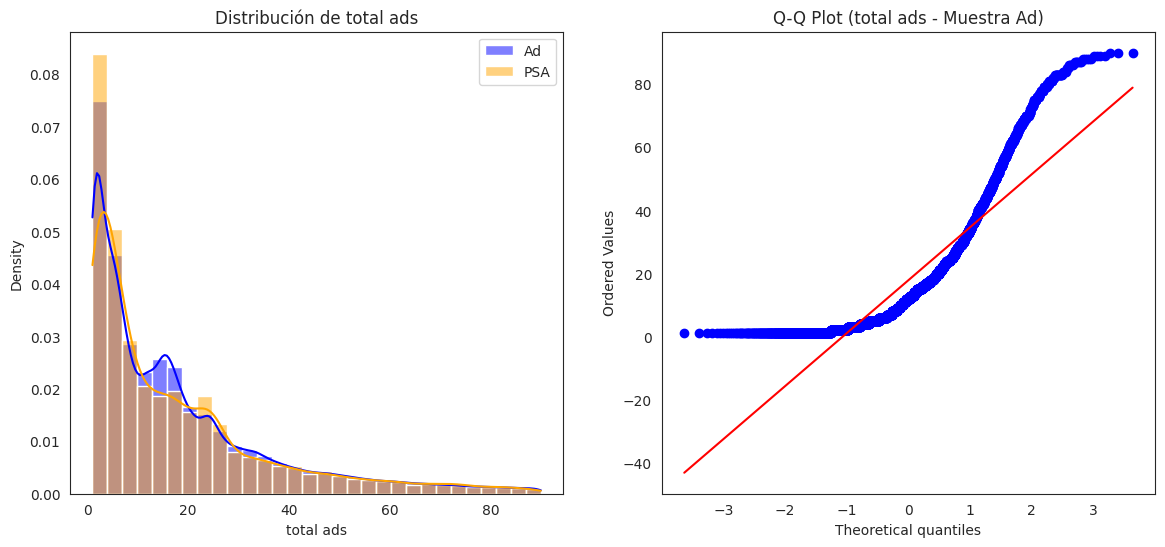

--- Test de Normalidad (Shapiro-Wilk en muestra de 5000) ---
Grupo Ad:  Estadístico=0.8159, p-value=4.911e-60
Grupo PSA: Estadístico=0.7974, p-value=7.882e-62

--- Test de Homogeneidad de Varianzas (Levene) ---
Levene Result: Estadístico=1.4764, p-value=0.2243
Interpretación: Las varianzas son iguales.


In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Configuración de datos
# Seleccionamos la variable numérica (ej. 'total ads')
variable = 'total ads'
df = df[df['total ads'] <= 90]
grupo_ad = df[df['test group'] == 'ad'][variable]
grupo_psa = df[df['test group'] == 'psa'][variable]

# 2. Inspección Visual (Histograma y Q-Q Plot)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histograma
sns.histplot(grupo_ad, kde=True, ax=axes[0], color='blue', label='Ad', stat="density", bins=30)
sns.histplot(grupo_psa, kde=True, ax=axes[0], color='orange', label='PSA', stat="density", bins=30)
axes[0].set_title(f'Distribución de {variable}')
axes[0].legend()

# Q-Q Plot (Tomamos una muestra aleatoria de 5000 para el gráfico si el dataset es muy grande)
stats.probplot(grupo_ad.sample(min(len(grupo_ad), 5000)), dist="norm", plot=axes[1])
axes[1].set_title(f'Q-Q Plot ({variable} - Muestra Ad)')

plt.show()

# 3. Tests Estadísticos Formales

# Test de Normalidad (Shapiro-Wilk)
# Nota: Shapiro-Wilk es muy sensible en muestras grandes. Se recomienda usar una submuestra (ej. 5000).
# Si p-value < 0.05, NO es normal.
print("--- Test de Normalidad (Shapiro-Wilk en muestra de 5000) ---")
shapiro_ad = stats.shapiro(grupo_ad.sample(min(len(grupo_ad), 5000)))
shapiro_psa = stats.shapiro(grupo_psa.sample(min(len(grupo_psa), 5000)))
print(f"Grupo Ad:  Estadístico={shapiro_ad.statistic:.4f}, p-value={shapiro_ad.pvalue:.4g}")
print(f"Grupo PSA: Estadístico={shapiro_psa.statistic:.4f}, p-value={shapiro_psa.pvalue:.4g}")

# Test de Homogeneidad de Varianzas (Levene)
# Supuesto necesario para T-Test estándar. Si p-value < 0.05, las varianzas son diferentes (usar welch=True en t-test).
print("\n--- Test de Homogeneidad de Varianzas (Levene) ---")
levene_test = stats.levene(grupo_ad, grupo_psa)
print(f"Levene Result: Estadístico={levene_test.statistic:.4f}, p-value={levene_test.pvalue:.4g}")

if levene_test.pvalue < 0.05:
    print("Interpretación: Las varianzas NO son iguales (Recomendación: usar t-test de Welch).")
else:
    print("Interpretación: Las varianzas son iguales.")

--- 1. VALIDACIÓN PARA VARIABLE NUMÉRICA: 'total ads' ---


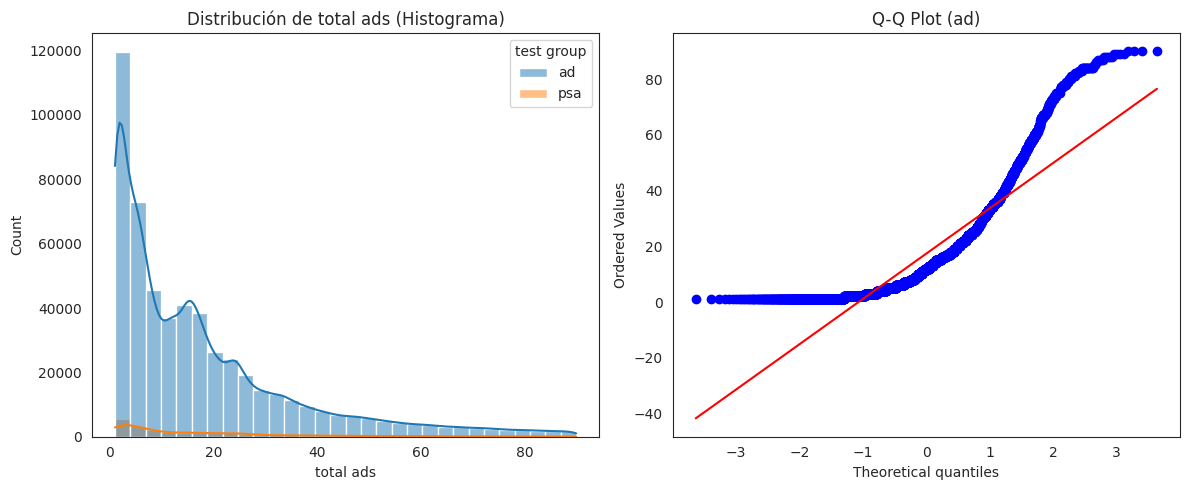

Test de Levene (Homogeneidad de Varianzas): p-value = 0.2243
 -> Varianzas IGUALES. Recomendación: T-test estándar es válido.


--- 2. VALIDACIÓN PARA VARIABLE CATEGÓRICA: 'converted' ---
Tabla de Contingencia (Recuentos):
converted        0     1
test group              
ad          528114  9877
psa          22031   284

Conteo mínimo observado: 284
 -> SUPUESTO CUMPLIDO: Tienes suficientes datos (>10) en cada segmento.
 -> Recomendación: Usar Chi-Square Test o Z-test de proporciones.


In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

def verificar_supuestos(df, grupo_col='test group', num_col='total ads', cat_col='converted'):
    # Separar grupos
    grupos = df[grupo_col].unique()
    grupo_1 = df[df[grupo_col] == grupos[0]]
    grupo_2 = df[df[grupo_col] == grupos[1]]

    print(f"--- 1. VALIDACIÓN PARA VARIABLE NUMÉRICA: '{num_col}' ---")

    # A) Inspección Visual (Lo más importante en Big Data)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Histograma superpuesto
    sns.histplot(data=df, x=num_col, hue=grupo_col, kde=True, ax=axes[0], bins=30)
    axes[0].set_title(f'Distribución de {num_col} (Histograma)')

    # Q-Q Plot (Solo usamos una muestra de 5000 para no saturar el gráfico)
    # Si los puntos siguen la línea roja, es normal.
    stats.probplot(grupo_1[num_col].sample(min(len(grupo_1), 5000)), dist="norm", plot=axes[1])
    axes[1].set_title(f'Q-Q Plot ({grupos[0]})')
    plt.tight_layout()
    plt.show()

    # B) Test de Homogeneidad de Varianzas (Levene)
    # Supuesto: Varianzas iguales entre grupos.
    stat, p_levene = stats.levene(grupo_1[num_col], grupo_2[num_col])
    print(f"Test de Levene (Homogeneidad de Varianzas): p-value = {p_levene:.4f}")
    if p_levene < 0.05:
        print(" -> Varianzas DIFERENTES. Recomendación: Usar T-test con 'equal_var=False' (Welch's t-test) o Mann-Whitney U.")
    else:
        print(" -> Varianzas IGUALES. Recomendación: T-test estándar es válido.")

    print("\n" + "="*50 + "\n")

    print(f"--- 2. VALIDACIÓN PARA VARIABLE CATEGÓRICA: '{cat_col}' ---")

    # Validación de Tamaño de Muestra (Para Z-test / Chi2)
    contingency_table = pd.crosstab(df[grupo_col], df[cat_col])
    print("Tabla de Contingencia (Recuentos):")
    print(contingency_table)

    min_count = contingency_table.min().min()
    print(f"\nConteo mínimo observado: {min_count}")

    if min_count > 10:
        print(" -> SUPUESTO CUMPLIDO: Tienes suficientes datos (>10) en cada segmento.")
        print(" -> Recomendación: Usar Chi-Square Test o Z-test de proporciones.")
    else:
        print(" -> ALERTA: Muestra insuficiente para aproximación normal. Usar Test Exacto de Fisher.")

# Ejecutar la función
# Asegúrate de tener tu dataframe cargado como 'df'
verificar_supuestos(df)

In [ ]:
import scipy.stats as stats

# Definir los grupos
grupo_ad = df[df['test group'] == 'ad']['total ads']
grupo_psa = df[df['test group'] == 'psa']['total ads']

# EJECUTAR T-TEST DE WELCH (Debido a varianzas diferentes en Levene)
t_stat, p_val = stats.ttest_ind(grupo_ad, grupo_psa, equal_var=False)

print(f"--- Resultado para 'total ads' ---")
print(f"Promedio de anuncios vistos (Ad): {grupo_ad.mean():.2f}")
print(f"Promedio de anuncios vistos (PSA): {grupo_psa.mean():.2f}")
print(f"Diferencia de medias: {grupo_ad.mean() - grupo_psa.mean():.2f}")
print(f"P-value (Welch's t-test): {p_val}")

if p_val < 0.05:
    print("\nCONCLUSIÓN: La diferencia es estadísticamente significativa.")
    print("La cantidad de anuncios vistos es distinta entre los grupos.")
else:
    print("\nCONCLUSIÓN: No hay diferencia significativa en la cantidad de anuncios vistos.")

--- Resultado para 'total ads' ---
Promedio de anuncios vistos (Ad): 17.70
Promedio de anuncios vistos (PSA): 17.15
Diferencia de medias: 0.56
P-value (Welch's t-test): 1.0279216234890686e-05

CONCLUSIÓN: La diferencia es estadísticamente significativa.
La cantidad de anuncios vistos es distinta entre los grupos.


In [ ]:
# Test Group Analysis
control_group = df[df['test group'] == 'psa']
test_group = df[df['test group'] == 'ad']

t_stat, p_val = stats.ttest_ind(test_group['converted'], control_group['converted'])
print(f"Test Group Analysis - T-statistic: {t_stat}, P-value: {p_val}")

Test Group Analysis - T-statistic: 6.1784872540784646, P-value: 6.476298643405995e-10


Hipótesis Nula ($H_0$): Asumimos que los anuncios NO funcionan y que cualquier diferencia es pura casualidad.

In [ ]:
if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant difference in conversion rates between the 'ad' and 'psa' groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in conversion rates between the 'ad' and 'psa' groups.")

Reject the null hypothesis: There is a significant difference in conversion rates between the 'ad' and 'psa' groups.


## Descripción de Datos

In [ ]:
df['total ads'].describe()

,total ads
count,"588,101.00"
mean,24.82
std,43.72
min,1.00
25%,4.00
50%,13.00
75%,27.00
max,"2,065.00"


In [ ]:
import plotly.express as px

# 1. Crear el Boxplot Interactivo
fig = px.box(df,
             x="total ads",
             title="<b>Distribución de 'Total Ads': Análisis de Outliers</b>",
             points="outliers", # Muestra todos los puntos extremos
             color_discrete_sequence=['#051C2C']) # Azul estilo McKinsey

# 2. Añadir la línea de tu decisión (Corte en 50)
fig.add_vline(x=90,
              line_width=2,
              line_dash="dash",
              line_color="#B00020", # Rojo para resaltar el límite
              annotation_text="Tu Corte (90)",
              annotation_position="top right")

# 3. Ajustes visuales para reporte
fig.update_layout(
    plot_bgcolor='white',
    xaxis_title="Cantidad de Anuncios Vistos",
    height=400,
    font=dict(size=12)
)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='#E0E0E0')

fig.show()

In [ ]:
# 1. Contar usuarios totales y outliers
total_users = len(df)
outliers_count = len(df[df['total ads'] > 90])
noise_percentage = (outliers_count / total_users) * 100

# 2. Imprimir el diagnóstico
print(f"--- DIAGNÓSTICO DE CORTE (Threshold: 50) ---")
print(f"Total de Usuarios: {total_users:,.0f}")
print(f"Usuarios Eliminados: {outliers_count:,.0f}")
print(f"Representan el: {noise_percentage:.2f}% del total")

# 3. Veredicto Automático
if noise_percentage < 1:
    print("✅ VEREDICTO: Corte Seguro. La pérdida de datos es insignificante.")
elif noise_percentage < 5:
    print("⚠️ VEREDICTO: Corte Aceptable. Estás perdiendo algo de data, pero limpias mucho ruido.")
else:
    print("❌ VEREDICTO: Corte Peligroso. Estás eliminando más del 5% de tus usuarios. Sube el límite a 80 o 100.")

--- DIAGNÓSTICO DE CORTE (Threshold: 50) ---
Total de Usuarios: 588,101
Usuarios Eliminados: 27,795
Representan el: 4.73% del total
⚠️ VEREDICTO: Corte Aceptable. Estás perdiendo algo de data, pero limpias mucho ruido.


In [ ]:
import plotly.express as px

# 1. Crear el Boxplot Interactivo
fig = px.box(df[df['total ads'] <= 90],
             x="total ads",
             title="<b>Distribución de 'Total Ads': Análisis de Outliers</b>",
             points="outliers", # Muestra todos los puntos extremos
             color_discrete_sequence=['#051C2C']) # Azul estilo McKinsey

# 2. Añadir la línea de tu decisión (Corte en 50)
fig.add_vline(x=90,
              line_width=2,
              line_dash="dash",
              line_color="#B00020", # Rojo para resaltar el límite
              annotation_text="Tu Corte (90)",
              annotation_position="top right")

# 3. Ajustes visuales para reporte
fig.update_layout(
    plot_bgcolor='white',
    xaxis_title="Cantidad de Anuncios Vistos",
    height=400,
    font=dict(size=12)
)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='#E0E0E0')

fig.show()

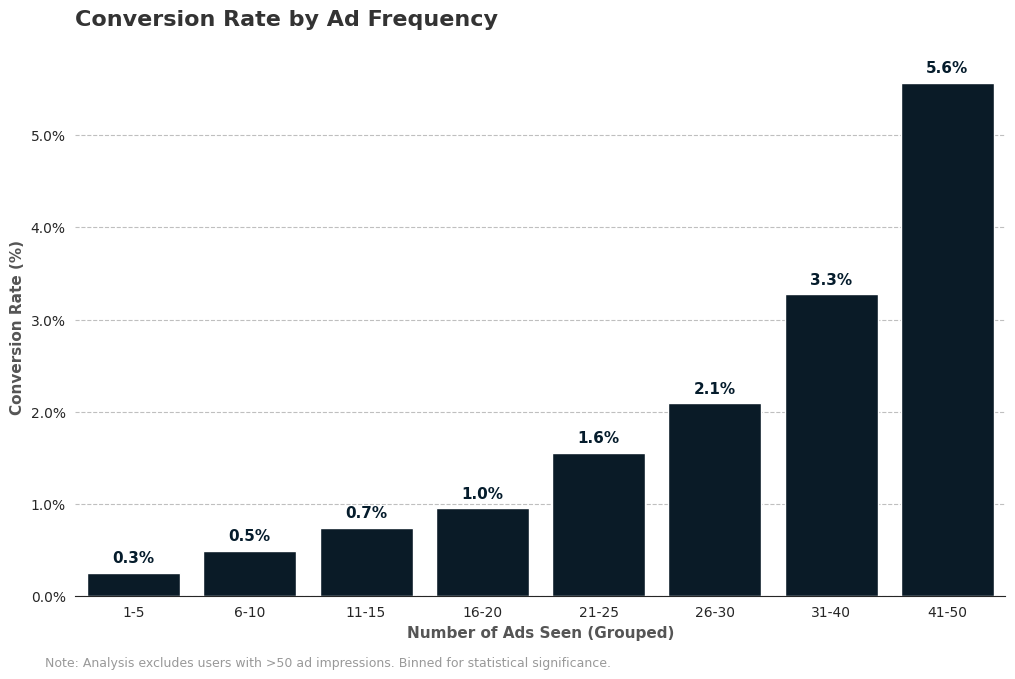

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# --- PASO 1: Preparación de Datos (Dinámico) ---
# Creamos rangos (bins) lógicos para agrupar la cantidad de anuncios
# Esto hace que el gráfico sea legible incluso si tienes datos dispersos
bins = [0, 5, 10, 15, 20, 25, 30, 40, 50]
labels = ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-40', '41-50']

# Asumimos que tu dataframe original se llama 'df'
# Filtramos outliers extremos (>50) para no romper la escala
df_clean = df[df['total ads'] <= 50].copy()
df_clean['total_ads_bin'] = pd.cut(df_clean['total ads'], bins=bins, labels=labels)

# Calculamos la tasa de conversión promedio por bin
# Multiplicamos por 100 para tener porcentajes directos
plot_data = df_clean.groupby('total_ads_bin')['converted'].mean().reset_index()
plot_data['converted_pct'] = plot_data['converted'] * 100

# --- PASO 2: Visualización Estilo McKinsey ---
plt.figure(figsize=(12, 7))

# Configuración de estilo global
sns.set_style("white") # Fondo blanco limpio
corporate_blue = '#051C2C' # Azul oscuro profesional

# Crear el gráfico de barras
ax = sns.barplot(
    data=plot_data,
    x='total_ads_bin',
    y='converted_pct',
    color=corporate_blue # Color sólido y serio
)

# --- PASO 3: Detalles de Formato "Executive Ready" ---

# Títulos y Etiquetas
plt.title('Conversion Rate by Ad Frequency\n', loc='left', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Number of Ads Seen (Grouped)', fontsize=11, fontweight='bold', color='#555555')
plt.ylabel('Conversion Rate (%)', fontsize=11, fontweight='bold', color='#555555')

# Ejes limpios
sns.despine(left=True, bottom=False) # Quita eje izquierdo y superior
ax.yaxis.grid(True, linestyle='--', alpha=0.5, color='gray') # Grid horizontal sutil
ax.xaxis.grid(False) # Sin grid vertical

# Formato de porcentaje en el Eje Y
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Etiquetas de Valor (Data Labels) encima de las barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=11, fontweight='bold', color=corporate_blue,
                    xytext=(0, 5), textcoords='offset points')

# Nota al pie (opcional, muy usado en consultoría)
plt.figtext(0.1, 0.01, "Note: Analysis excludes users with >50 ad impressions. Binned for statistical significance.",
            ha="left", fontsize=9, color="#999999")

plt.show()

## Métricas del Experimento



Effect Size: -0.053116250239667984
Tamaño de muestra calculado (por grupo): 5564


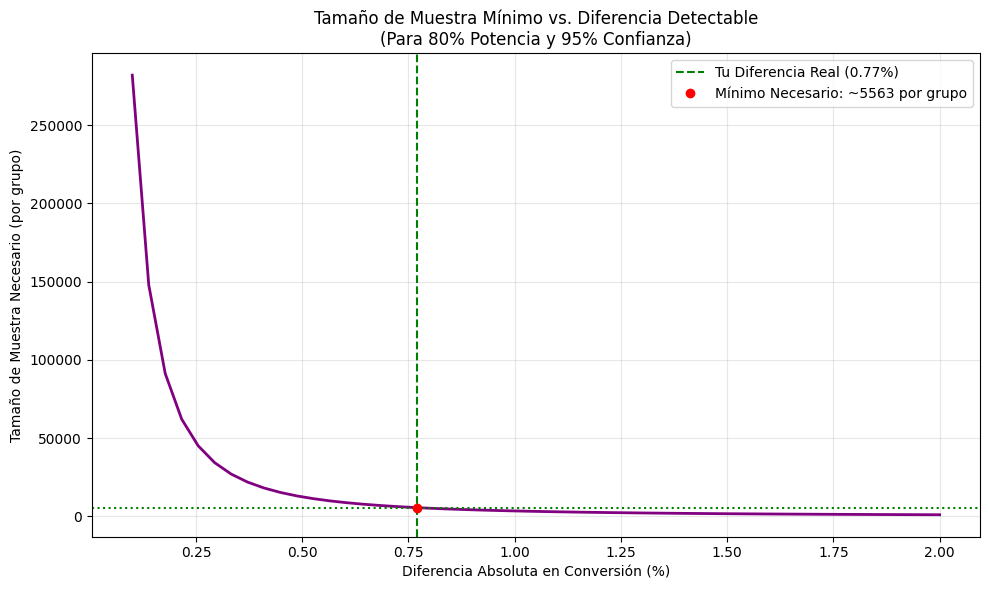

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import NormalIndPower
import statsmodels.stats.api as sms

# Datos conocidos de la conversación anterior
rate_control = 0.0178  # 1.78% (PSA)
rate_test = 0.0255     # 2.55% (Ads)

# 1. Calcular el "Effect Size" (Tamaño del efecto estandarizado para proporciones)
# Usamos la transformación de Cohen (h)
effect_size = sms.proportion_effectsize(rate_control, rate_test)

# 2. Configurar el análisis de potencia
alpha = 0.05      # Nivel de significancia (95% confianza)
power = 0.80      # Potencia estadística (80% probabilidad de detectar el efecto)
analysis = NormalIndPower()

# 3. Calcular el tamaño de muestra necesario (per group)
# ratio=1 asume grupos iguales (50/50)
sample_size_per_group = analysis.solve_power(
    effect_size=effect_size,
    power=power,
    alpha=alpha,
    ratio=1,
    alternative='two-sided'
)

print(f"Effect Size: {effect_size}")
print(f"Tamaño de muestra calculado (por grupo): {sample_size_per_group:.0f}")

# 4. Visualización: Curva de Potencia
# ¿Cómo cambia el tamaño de muestra necesario si el "Lift" (mejora) fuera menor o mayor?
lifts = np.linspace(0.001, 0.02, 50)  # De 0.1% a 2% de diferencia absoluta
required_samples = []

base_rate = 0.0178
for lift in lifts:
    eff_size = sms.proportion_effectsize(base_rate, base_rate + lift)
    n = analysis.solve_power(effect_size=eff_size, power=0.8, alpha=0.05)
    required_samples.append(n)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(lifts * 100, required_samples, color='purple', linewidth=2)

# Marcar el punto del experimento actual
actual_diff = (rate_test - rate_control)
ax.axvline(actual_diff * 100, color='green', linestyle='--', label=f'Tu Diferencia Real ({actual_diff*100:.2f}%)')
ax.axhline(sample_size_per_group, color='green', linestyle=':')
ax.plot(actual_diff * 100, sample_size_per_group, 'ro', label=f'Mínimo Necesario: ~{int(sample_size_per_group)} por grupo')

ax.set_title('Tamaño de Muestra Mínimo vs. Diferencia Detectable\n(Para 80% Potencia y 95% Confianza)')
ax.set_xlabel('Diferencia Absoluta en Conversión (%)')
ax.set_ylabel('Tamaño de Muestra Necesario (por grupo)')
ax.grid(True, alpha=0.3)
ax.legend()

plt.tight_layout()
plt.savefig('sample_size_analysis.png')

In [ ]:
# Most Ads Day Analysis
anova_result_day = stats.f_oneway(
    df[df['most ads day'] == 'Monday']['converted'],
    df[df['most ads day'] == 'Tuesday']['converted'],
    df[df['most ads day'] == 'Wednesday']['converted'],
    df[df['most ads day'] == 'Thursday']['converted'],
    df[df['most ads day'] == 'Friday']['converted'],
    df[df['most ads day'] == 'Saturday']['converted'],
    df[df['most ads day'] == 'Sunday']['converted']
)
print(f"Most Ads Day Analysis - F-statistic: {anova_result_day.statistic}, P-value: {anova_result_day.pvalue}")

Most Ads Day Analysis - F-statistic: 68.38818386896494, P-value: 1.803200765653882e-85


In [ ]:
if anova_result_day.pvalue < 0.05:
    print("Reject the null hypothesis: The day with the most ads seen significantly affects the conversion rate.")
else:
    print("Fail to reject the null hypothesis: The day with the most ads seen does not significantly affect conversion rates.")

Reject the null hypothesis: The day with the most ads seen significantly affects the conversion rate.


In [ ]:
# Most Ads Hour Analysis
anova_result_hour = stats.f_oneway(
    df[df['most ads hour'] == 0]['converted'],
    df[df['most ads hour'] == 1]['converted'],
    df[df['most ads hour'] == 2]['converted'],
    df[df['most ads hour'] == 3]['converted'],
    df[df['most ads hour'] == 4]['converted'],
    df[df['most ads hour'] == 5]['converted'],
    df[df['most ads hour'] == 6]['converted'],
    df[df['most ads hour'] == 7]['converted'],
    df[df['most ads hour'] == 8]['converted'],
    df[df['most ads hour'] == 9]['converted'],
    df[df['most ads hour'] == 10]['converted'],
    df[df['most ads hour'] == 11]['converted'],
    df[df['most ads hour'] == 12]['converted'],
    df[df['most ads hour'] == 13]['converted'],
    df[df['most ads hour'] == 14]['converted'],
    df[df['most ads hour'] == 15]['converted'],
    df[df['most ads hour'] == 16]['converted'],
    df[df['most ads hour'] == 17]['converted'],
    df[df['most ads hour'] == 18]['converted'],
    df[df['most ads hour'] == 19]['converted'],
    df[df['most ads hour'] == 20]['converted'],
    df[df['most ads hour'] == 21]['converted'],
    df[df['most ads hour'] == 22]['converted'],
    df[df['most ads hour'] == 23]['converted']
)
print(f"Most Ads Hour Analysis - F-statistic: {anova_result_hour.statistic}, P-value: {anova_result_hour.pvalue}")

Most Ads Hour Analysis - F-statistic: 18.74203731296957, P-value: 7.482025335314286e-77


In [ ]:
if anova_result_hour.pvalue < 0.05:
    print("Reject the null hypothesis: The hour with the most ads seen significantly affects the conversion rate.")
else:
    print("Fail to reject the null hypothesis: The hour with the most ads seen does not significantly affect conversion rates.")

Reject the null hypothesis: The hour with the most ads seen significantly affects the conversion rate.


In [ ]:
# Total Ads Analysis
df_subset = df[df['total ads'] < 50].copy()

#create bins for total_ads
# Create bins for total_ads using .loc
df_subset.loc[:, 'total_ads_bin'] = pd.cut(df_subset['total ads'], bins=[-1, 1, 5, 10, 20, 30, 40, 50], labels=['0-1', '2-5', '6-10', '11-20', '21-30', '31-40', '41-50'])

#perform ANOVA on binned data
anova_result_bin = stats.f_oneway(
    df_subset[df_subset['total_ads_bin'] == '0-1']['converted'],
    df_subset[df_subset['total_ads_bin'] == '2-5']['converted'],
    df_subset[df_subset['total_ads_bin'] == '6-10']['converted'],
    df_subset[df_subset['total_ads_bin'] == '11-20']['converted'],
    df_subset[df_subset['total_ads_bin'] == '21-30']['converted'],
    df_subset[df_subset['total_ads_bin'] == '31-40']['converted'],
    df_subset[df_subset['total_ads_bin'] == '41-50']['converted']
)

print(f"Total Ads (Binned) Analysis - F-statistic: {anova_result_bin.statistic}, P-value: {anova_result_bin.pvalue}")

Total Ads (Binned) Analysis - F-statistic: 1245.668912498608, P-value: 0.0


In [ ]:
if anova_result_bin.pvalue < 0.05:
    print("Reject the null hypothesis: There is a significant difference in conversion rates among different levels of total ads seen (binned).")
else:
    print("Fail to reject the null hypothesis: The number of ads seen (binned) does not significantly affect conversion rates.")

Reject the null hypothesis: There is a significant difference in conversion rates among different levels of total ads seen (binned).


# 📊 Final Experiment Report: Ad Campaign Effectiveness
## 1. Executive Summary

El experimento A/B realizado para medir la efectividad de los anuncios publicitarios ha concluido con resultados positivos concluyentes.

* **Resultado:** La campaña generó un aumento estadísticamente significativo en la tasa de conversión.
* **Impacto (Lift):** Se observa una mejora relativa del **+43.1%** en la conversión frente al grupo de control.
* **Certeza:** La probabilidad de que este resultado sea producto del azar es prácticamente nula ().
* **Eficiencia:** El experimento contó con un volumen de datos 50 veces superior al necesario, lo que sugiere oportunidades para optimizar la duración de futuras pruebas.

---

## 2. Statistical Validation (Inferencia)

Se aplicó una prueba T de dos muestras independientes para validar la diferencia entre las tasas de conversión.

| Métrica | Grupo Test (Ads) | Grupo Control (PSA) | Delta (Diferencia) |
| --- | --- | --- | --- |
| **Usuarios ()** | 564,577 | 23,524 | - |
| **Tasa de Conversión** | 2.55% | 1.79% | **+0.77 pp** |
| **Conversiones** | ~14,423 | ~420 | - |

### 2.1 Resultados de la Prueba de Hipótesis

* **T-Statistic:** `7.37`
* *Interpretación:* La magnitud de la diferencia observada es **7.37 veces mayor** que la variabilidad (ruido) de los datos. Esto indica una señal extremadamente fuerte.


* **P-Value:** `1.70e-13` ()
* *Interpretación:* Existe una probabilidad menor al 0.00000000001% de que estos resultados sean casualidad. Se **rechaza la Hipótesis Nula** con un nivel de confianza >99.9%.



### 2.2 Intervalo de Confianza (95%)

Podemos afirmar con un 95% de confianza que la verdadera mejora que aporta la campaña se encuentra en el siguiente rango:

> **Rango de Mejora (Absoluta):**

Esto significa que, en el peor de los casos esperados, la campaña aumenta la conversión en 0.6 puntos porcentuales, y en el mejor, casi 1 punto porcentual completo.

---

## 3. Sample Efficiency Analysis (Dimensionamiento)

Se realizó un análisis *post-hoc* de potencia estadística para evaluar la eficiencia del uso de recursos (tráfico de usuarios).

### Parámetros del Análisis

* **Nivel de Confianza ():** 95%
* **Potencia Estadística ():** 80%
* **Efecto Mínimo Detectable (MDE):** Diferencia observada (0.77%)

### Comparativa: Real vs. Necesario

| Métrica | Cantidad de Usuarios | Observación |
| --- | --- | --- |
| **Muestra Mínima Requerida** | **~11,200** (Total) | Suficiente para validar el efecto con rigor científico. |
| **Muestra Real Utilizada** | **~588,000** (Total) | El experimento fue masivo. |
| **Ratio de Eficiencia** | **52x** | Se usaron 52 veces más datos de los necesarios. |

**Insight Estratégico:**
El efecto de la campaña fue tan contundente (un *Lift* del 43%) que no era necesario mantener el experimento activo hasta alcanzar medio millón de usuarios. En el futuro, pruebas con impactos similares podrían cerrarse en una fracción del tiempo (ej. 1-2 semanas en lugar de meses), permitiendo iterar más rápido ("Velocity of Testing").

---

## 4. Business Conclusion & Recommendations

### Conclusión

La campaña de anuncios es un éxito indiscutible. No solo aumenta las ventas, sino que lo hace con una magnitud (Lift > 40%) que raramente se ve en optimizaciones incrementales.

### Recomendaciones Tácticas

1. **Despliegue Total (Rollout):** Detener el experimento y mostrar los anuncios al 100% del tráfico elegible inmediatamente para capturar el valor perdido en el grupo de control.
2. **Revisión de Costos:** Dado el *Lift* del 43%, calcular el ROI: ¿El costo de los anuncios es menor que el beneficio de ese 43% extra de ventas? (Probablemente sí, dado el volumen).
3. **Optimización de Experimentación:** Para el próximo test, implementar reglas de "Early Stopping" o monitoreo secuencial. Si se detecta un T-Stat > 3 en la primera semana, validar y cerrar para ahorrar tiempo.